In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fastai import *
from fastai.vision import *

%matplotlib inline

In [8]:
path = "../data/train_data/"
test_df = pd.read_csv("../data/test_WyRytb0.csv")
sample_sub = pd.read_csv("../data/sample_submission_CH2mq5Z.csv")
df = pd.read_csv("../data/train/train.csv")
bs = 8

In [9]:
test_df.head()

,image_name
0,3.jpg
1,5.jpg
2,6.jpg
3,11.jpg
4,14.jpg


In [10]:
sample_sub.head()

,image_name,label
0,3.jpg,0
1,5.jpg,0
2,6.jpg,0
3,11.jpg,0
4,14.jpg,0


In [11]:
df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [12]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0.5)

In [18]:
data = (ImageList.from_csv(path, csv_name = '../train/train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test_data/')              
        .transform(tfms, size=128)
        .databunch(num_workers=0))

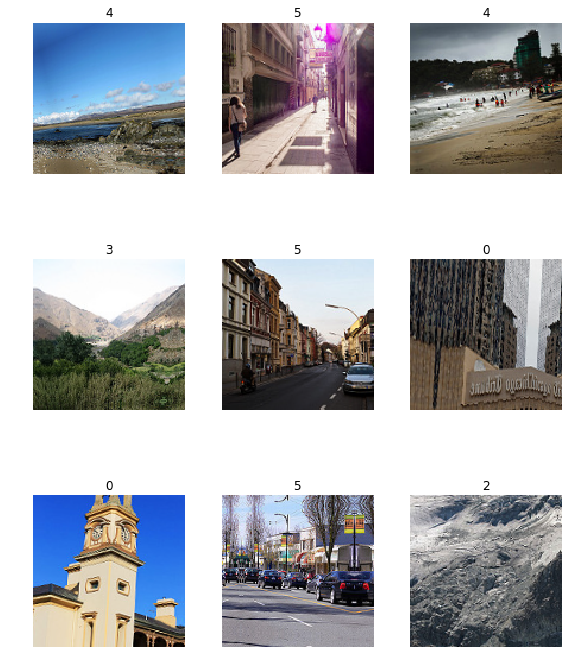

In [19]:
data.show_batch(rows=3, figsize=(8,10))

In [20]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

In [21]:
learn.fit_one_cycle(1)
#learn.save("../model/last_lay10")

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.539931,0.333547,0.120669,0.879331,01:34


In [31]:
preds = learn.get_preds()

In [32]:
len(sample_sub)

7301

In [33]:
len(preds)

2

In [34]:
len(preds[1])

3406

In [63]:
pred_list = []
for i in range(len(sample_sub)):
    t_preds = np.argmax(np.asarray(learn.predict(learn.data.test_ds[i][0])[2]))
    pred_list.append(t_preds)
    

In [65]:
pred_list

[3,
 2,
 5,
 4,
 4,
 5,
 4,
 2,
 4,
 3,
 4,
 0,
 2,
 2,
 4,
 4,
 3,
 0,
 2,
 5,
 2,
 3,
 4,
 2,
 0,
 5,
 0,
 2,
 3,
 0,
 3,
 4,
 1,
 1,
 4,
 5,
 5,
 2,
 0,
 2,
 5,
 5,
 1,
 1,
 0,
 2,
 3,
 1,
 0,
 3,
 0,
 4,
 0,
 1,
 2,
 0,
 2,
 4,
 0,
 2,
 5,
 5,
 1,
 3,
 2,
 3,
 5,
 4,
 1,
 4,
 4,
 0,
 0,
 5,
 2,
 3,
 1,
 3,
 2,
 2,
 5,
 3,
 5,
 4,
 2,
 4,
 1,
 3,
 3,
 2,
 3,
 2,
 4,
 0,
 2,
 5,
 3,
 4,
 2,
 4,
 4,
 1,
 3,
 4,
 2,
 0,
 0,
 1,
 3,
 5,
 2,
 4,
 0,
 5,
 0,
 3,
 3,
 2,
 2,
 1,
 3,
 3,
 4,
 3,
 1,
 2,
 1,
 1,
 5,
 1,
 1,
 0,
 1,
 2,
 5,
 1,
 5,
 3,
 0,
 1,
 3,
 2,
 2,
 4,
 0,
 5,
 2,
 2,
 0,
 3,
 2,
 3,
 3,
 3,
 1,
 1,
 0,
 4,
 5,
 1,
 0,
 2,
 0,
 1,
 1,
 3,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 4,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 5,
 5,
 0,
 1,
 4,
 0,
 4,
 5,
 1,
 4,
 1,
 3,
 5,
 0,
 0,
 5,
 4,
 3,
 3,
 4,
 2,
 2,
 3,
 4,
 2,
 5,
 5,
 1,
 3,
 4,
 2,
 5,
 2,
 0,
 0,
 5,
 3,
 5,
 0,
 2,
 1,
 0,
 3,
 2,
 5,
 5,
 1,
 3,
 3,
 0,
 5,
 3,
 3,
 1,
 1,
 4,
 0,
 1,
 5,
 1,
 5,
 1,
 3,
 5,
 3,
 5,


In [66]:
sample_sub.head()

,image_name,label
0,3.jpg,0
1,5.jpg,0
2,6.jpg,0
3,11.jpg,0
4,14.jpg,0


In [67]:
sample_sub['label'] = pred_list

In [68]:
sample_sub.head()

,image_name,label
0,3.jpg,3
1,5.jpg,2
2,6.jpg,5
3,11.jpg,4
4,14.jpg,4


In [69]:
sample_sub.to_csv("../subs/once_cycle_resnet.csv",index=False)